Import all Needed Libraries and Modules.

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
import keras
import tensorflow  as tf 
from tensorflow.keras.models import Model
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D, Flatten, Dense, Dropout


Load the Dataset

In [2]:
try:
    for dirname, _, filenames in os.walk('ECG/inputs/'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
except Exception as e:
    print(f"An error occurred: {e}")

ECG/inputs/dataECG\mitbih_test.csv
ECG/inputs/dataECG\mitbih_train.csv
ECG/inputs/dataECG\ptbdb_abnormal.csv
ECG/inputs/dataECG\ptbdb_normal.csv


In [3]:
train_data = pd.read_csv('ECG/inputs/dataECG/mitbih_train.csv', header=None)
test_data = pd.read_csv('ECG/inputs/dataECG/mitbih_test.csv',header=None)


#split target and value
train_target = train_data[187]
test_target  = test_data [187]
train = train_data.drop(187,axis=1)
test = test_data.drop(187,axis=1)

In [4]:
train_data.shape

(87554, 188)

In [5]:
train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's Explore the Dataset to see how it looks like.

In [6]:
expl_mitbih_train = train_target.copy()

In [7]:
expl_mitbih_test = test_target.copy()

In [8]:
expl_mitbih_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [9]:
expl_train = expl_mitbih_train.astype(int)

explor_train = expl_train.value_counts()

In [10]:
explor_train

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

Let's see the data representation using Pie chart.

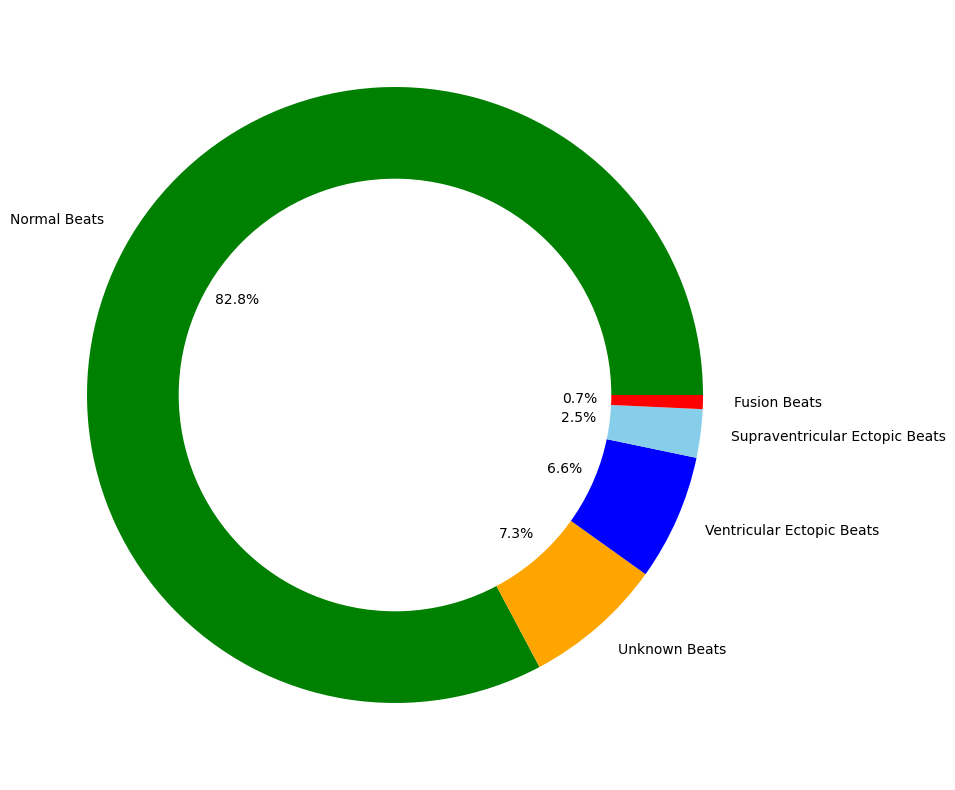

In [11]:
plt.figure(figsize = (10, 10))
circle = plt.Circle((0, 0), 0.7, color = "white")
plt.pie(explor_train, labels = ["Normal Beats", "Unknown Beats", "Ventricular Ectopic Beats", "Supraventricular Ectopic Beats", "Fusion Beats"], colors = ["green", "orange", "blue", "skyblue", "red"], autopct = "%1.1f%%")
k = plt.gcf()
k.gca().add_artist(circle)
plt.show()

Let's take a look at what each heart beat represented in the data look like.

In [12]:
classes = train_data.groupby(187, group_keys = False).apply(lambda train_data : train_data.sample(1))

In [13]:
classes

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
44240,0.903683,0.526912,0.124646,0.011331,0.028329,0.014164,0.011331,0.002833,0.008499,0.008499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74441,1.000000,0.905138,0.272727,0.019763,0.102767,0.177866,0.118577,0.142292,0.213439,0.201581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80419,0.930159,0.796825,0.571429,0.193651,0.031746,0.019048,0.000000,0.012698,0.057143,0.130159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80685,1.000000,0.939462,0.724215,0.373318,0.150224,0.151345,0.142377,0.116592,0.108744,0.090807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
84606,0.907850,0.841866,0.763367,0.681456,0.577929,0.470990,0.365188,0.265074,0.186576,0.136519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Text(0.5, 1.0, 'Normal Heart Beat')

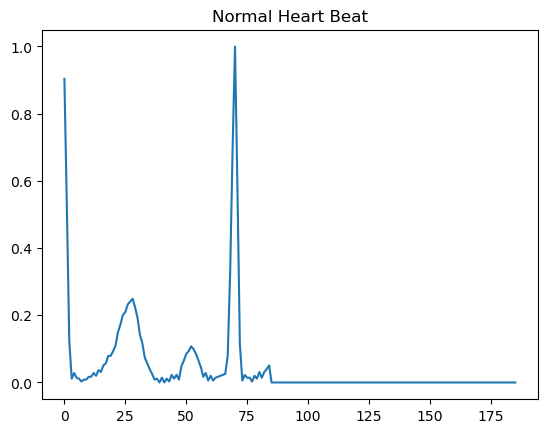

In [14]:
plt.plot(classes.iloc[0, : 186])
plt.title("Normal Heart Beat")

Text(0.5, 1.0, 'Supraventricular Ectopic Beat')

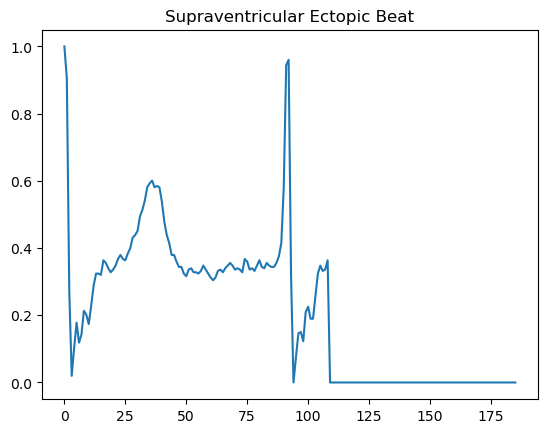

In [15]:
plt.plot(classes.iloc[1, : 186])
plt.title("Supraventricular Ectopic Beat")

Text(0.5, 1.0, 'Ventricular Ectopic Beat')

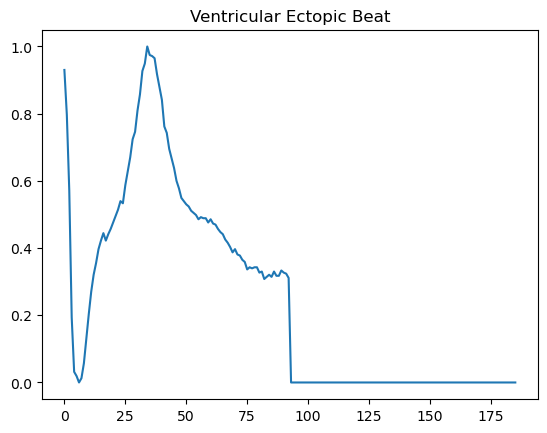

In [16]:
plt.plot(classes.iloc[2, : 186])
plt.title("Ventricular Ectopic Beat")

Text(0.5, 1.0, 'Fusion Beat')

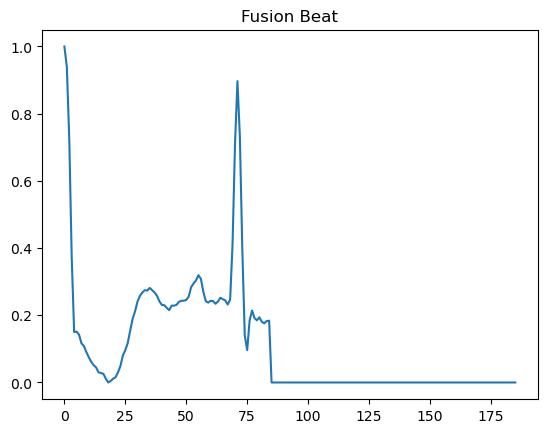

In [17]:
plt.plot(classes.iloc[3, : 186])
plt.title("Fusion Beat")

Text(0.5, 1.0, 'Unknown Beat')

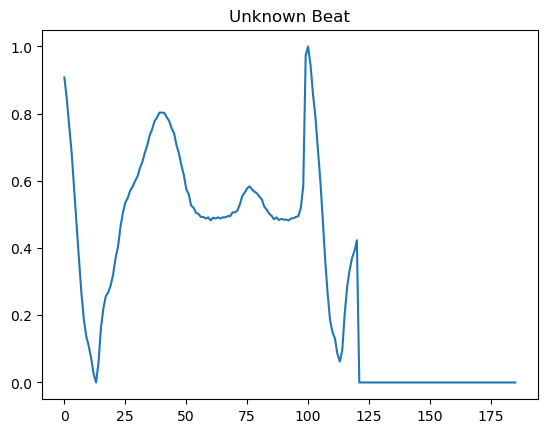

In [18]:
plt.plot(classes.iloc[4, : 186])
plt.title("Unknown Beat")

I will add a little Guasian Noise to the images just to help the model learn very well without over fitting.

In [19]:
np.random.seed (100)

def add_noise(signal):
    gaussian_noise = np.random.normal(0.2, 0.5, 186)
    noissy_signal = signal + gaussian_noise
    return noissy_signal

In [20]:
example = classes.iloc[0, : 186]

noissy_sample = add_noise(example)

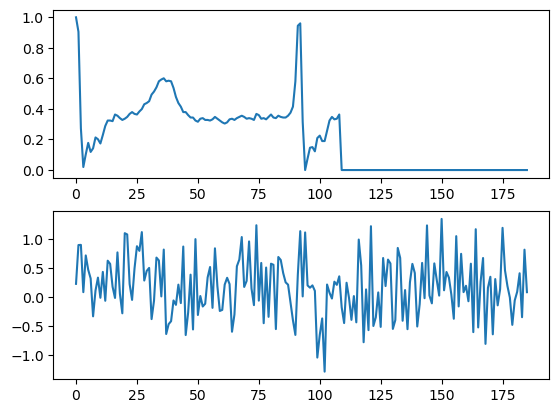

In [21]:
plt.subplot(2, 1, 1)
plt.plot(classes.iloc[1, : 186])

plt.subplot(2, 1, 2)
plt.plot(noissy_sample)

plt.show()

Data Preparation.

In [22]:
y_train = to_categorical(expl_mitbih_train)

y_test = to_categorical(expl_mitbih_test)

In [23]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
y_train.shape

(87554, 5)

In [25]:
x_train = train_data.iloc[ : ,  : 186].values
x_test = test_data.iloc[ : ,  : 186].values

In [26]:
x_train.shape

(87554, 186)

In [27]:
for k in range(len(x_train)):
    x_train[k, : 186] = add_noise(x_train[k, : 186])
x_train = x_train.reshape(len(x_train), x_train.shape[1], 1)
#x_traina = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(len(x_test), x_test.shape[1], 1)
#x_testa = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

Reshape the dataset.

In [28]:
#x_traina = x_traina.reshape(x_traina.shape[3], x_traina.shape[0], x_traina.shape[1], x_traina.shape[3])

In [29]:
#x_testa = x_testa.reshape(x_testa.shape[3], x_testa.shape[0], x_testa.shape[1], x_testa.shape[3])

In [30]:
##x_traina.shape

In [31]:
#x_testa.shape

In [32]:
x_train.shape

(87554, 186, 1)

`An adaptation of residual connection as in ResNet with basic CNN.`

In [33]:
def residual_block(x, filters, kernel_size = 3, strides = 1):
    # Shortcut connection
    shortcut = x
    
    # First convolution layer
    x = Conv1D(filters, kernel_size = kernel_size, strides = strides, padding = "same", kernel_initializer = GlorotUniform())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second convolution layer
    x = Conv1D(filters, kernel_size = kernel_size, strides = strides, padding = "same", kernel_initializer = GlorotUniform())(x)
    x = BatchNormalization()(x)
    
    # Adjusting the shortcut connection with a 1x1 convolution
    shortcut = Conv1D(filters, kernel_size = 1, strides = strides, padding = "same")(shortcut)
    
    # Adding the shortcut to the main path
    x = Add()([x, shortcut])
    x = Activation("selu")(x)
    
    return x

In [34]:
input_shape = (x_train.shape)
class_num = len(classes)

In [35]:
class_num

5

In [36]:
input_shape

(87554, 186, 1)

In [37]:
input = (x_train.shape[1], 1)

input_shape = tf.keras.Input(shape = input)

In [38]:
def build_model (input_shape, class_num):
    input_shape = input_shape
    #cnn_input = tf.keras.Input(shape = (input), name = "cnn_input")

    x = Conv1D(64, kernel_size = 5, strides = 2, padding = "same", kernel_initializer = GlorotUniform())(input_shape)
    x = BatchNormalization()(x)
    x = Activation("selu")(x)


    x = MaxPooling1D(pool_size = (3))(x)

    # Add the Residual Layer.
    x = residual_block(x, filters = 64)
    x = residual_block(x, filters = 64)
    x = residual_block(x, filters = 64)
    x = BatchNormalization()(x)

    x = MaxPooling1D(pool_size = (2))(x)

    x = Dropout(0.25)(x)

    x = residual_block(x, filters = 128)
    x = residual_block(x, filters = 128)
    x = BatchNormalization()(x)

    x = MaxPooling1D(pool_size = (2))(x)

    x = residual_block(x, filters = 256)

    x = MaxPooling1D(pool_size = (2))(x)

    flatten = Flatten()(x)

    x = Dense(128, activation = "selu", kernel_initializer = GlorotUniform())(flatten)
    x = Dropout(0.25)(x)
    x = Dense(256, activation = "selu", kernel_initializer = GlorotUniform())(x)

    model_output = Dense(class_num, activation = "softmax")(x)

    model = tf.keras.Model(inputs = input_shape, outputs = model_output)

    return model

In [39]:
input_shape

<KerasTensor: shape=(None, 186, 1) dtype=float32 (created by layer 'input_1')>

Create the Model.

In [40]:
model = build_model(input_shape, class_num)

In [41]:
model.compile(
    optimizer = keras.optimizers.legacy.Adam(learning_rate = 0.01),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 186, 1)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 93, 64)               384       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 93, 64)               256       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 93, 64)               0         ['batch_normalization[0][0

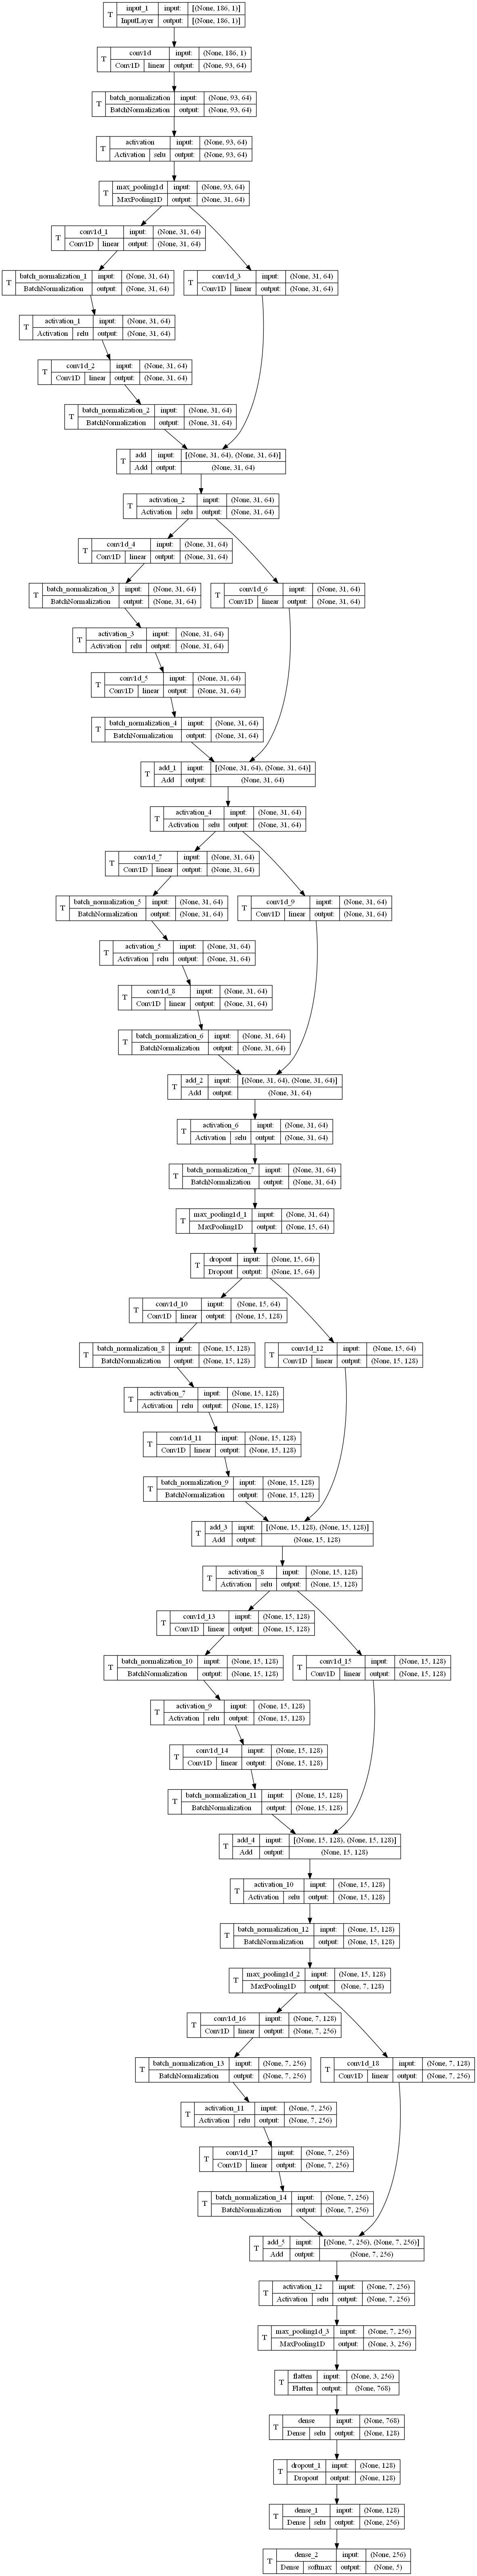

In [43]:
tf.keras.utils.plot_model(model,
                          to_file='modelv1a.png', 
                          show_layer_names=True,
                          show_layer_activations = True,
                          show_trainable = True,
                          show_shapes = True,
                          dpi=96)

In [44]:
callbacks = [
    EarlyStopping(monitor = "val_loss", patience = 10),
    ModelCheckpoint(filepath = "best_model.h5", monitor = "val_loss", save_best_only = True),
    TensorBoard(log_dir = "./tbb_logs")
            ]

In [45]:
x_train.shape

(87554, 186, 1)

In [46]:
y_test.shape

(21892, 5)

In [47]:
history = model.fit(
    x_train, y_train,
    epochs = 15,
    callbacks = callbacks,
    batch_size = 32,
    validation_data = (x_test, y_test)
)

Epoch 1/15


2737/2737 [==============================] - ETA: 0s - loss: 0.8484 - accuracy: 0.8205

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2737/2737 [==============================] - 122s 41ms/step - loss: 0.8484 - accuracy: 0.8205 - val_loss: 0.6877 - val_accuracy: 0.8276
Epoch 2/15
2737/2737 [==============================] - 115s 42ms/step - loss: 0.9567 - accuracy: 0.8225 - val_loss: 0.9086 - val_accuracy: 0.8276
Epoch 3/15
2737/2737 [==============================] - 111s 40ms/step - loss: 0.8097 - accuracy: 0.8252 - val_loss: 0.7179 - val_accuracy: 0.8276
Epoch 4/15
2737/2737 [==============================] - 113s 41ms/step - loss: 0.8228 - accuracy: 0.8228 - val_loss: 0.6890 - val_accuracy: 0.8276
Epoch 5/15
2737/2737 [==============================] - 111s 41ms/step - loss: 1.0696 - accuracy: 0.8229 - val_loss: 0.7331 - val_accuracy: 0.8276
Epoch 6/15
2737/2737 [==============================] - 113s 41ms/step - loss: 0.8153 - accuracy: 0.8249 - val_loss: 1.6891 - val_accuracy: 0.0735
Epoch 7/15
2737/2737 [==============================] - 112s 41ms/step - loss: 0.8239 - accuracy: 0.8214 - val_loss: 1.4536 - val